# Analyse des Ouragans sur l'arc antillais

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from utils.separationOuragan import getNumberOfHurricane, getSeparedHurricane
from utils.graphiqueByBasinAnsSubasin import getAllGraphique, getNumberHurricaneByYear, getStatsHurricaneByYear
from utils.trajectoireOuragans import getGraphicsHurricane
from utils.separationOuragan import getSeparedHurricaneByName, getOcurrenceDataframe, getMeanHurricane
from utils.graph import getGraphPressionVersusSpeed, getHistPressionVersusSpeed

## Les données


In [3]:
all_data = pd.read_csv("data/Historical_Hurricane_Tracks.csv")

In [4]:
print(f"Nous travaillons a partir d'un fichier csv contenant les données des ouragans et de tempêtes du monde entier depuis {all_data['year'].min()} jusqu'en {all_data['year'].max()}\n")
print(f"Le fichier contient {all_data.shape[0]} lignes et {all_data.shape[1]} colonnes")
print(f"\nLes colonnes sont : \n {all_data.columns.tolist()}")





Nous travaillons a partir d'un fichier csv contenant les données des ouragans et de tempêtes du monde entier depuis 1842 jusqu'en 2023

Le fichier contient 697476 lignes et 13 colonnes

Les colonnes sont : 
 ['OBJECTID', 'SID', 'BASIN', 'SUBBASIN', 'NAME', 'LAT', 'LON', 'USA_WIND', 'USA_PRES', 'year', 'month', 'day', 'Hurricane_Date']


In [5]:
# Compter les ouragans nommés
hurricanes_names = all_data[all_data['NAME'] != 'NOT_NAMED']
num_hurricanes_names = hurricanes_names.shape[0]

# Compter les ouragans non nommés
hurricanes_not_names = all_data[all_data['NAME'] == 'NOT_NAMED']
num_hurricanes_not_names = hurricanes_not_names.shape[0]



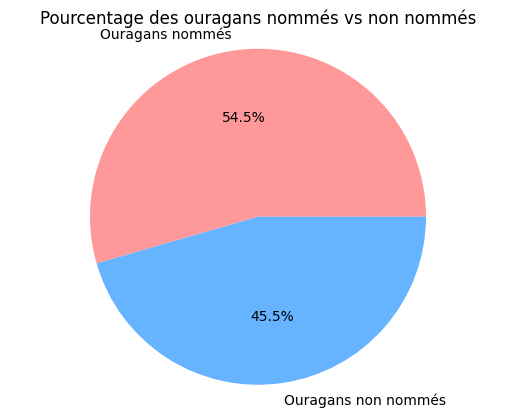

In [6]:
# Créer un camembert
labels = ['Ouragans nommés', 'Ouragans non nommés']
sizes = [num_hurricanes_names, num_hurricanes_not_names]
colors = ['#ff9999','#66b3ff']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("Pourcentage des ouragans nommés vs non nommés")
plt.axis('equal')

plt.show()

In [7]:
nb = getNumberOfHurricane(all_data)
nb_nomme = getNumberOfHurricane(hurricanes_names)


In [8]:
print(f"Ce fichier contient des information sur {nb} ouragans dont {nb_nomme} sont nommés")


Ce fichier contient des information sur 13611 ouragans dont 5673 sont nommés


nous utiliserons uniquement les ouragans nommés pour la suite de l'analyse

In [9]:
all_ouragans = getSeparedHurricane(hurricanes_names)

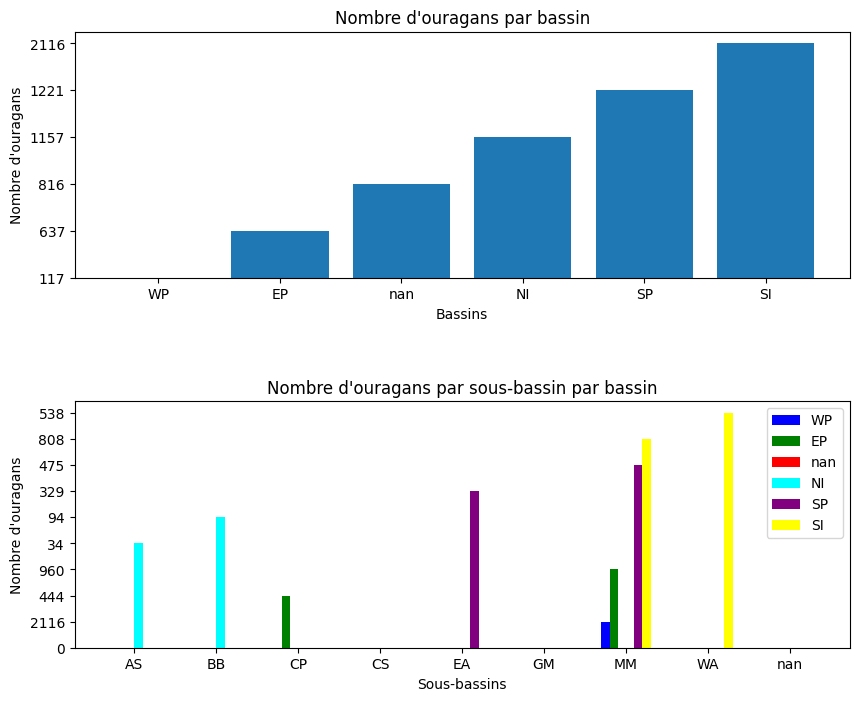

In [10]:
getAllGraphique(hurricanes_names)

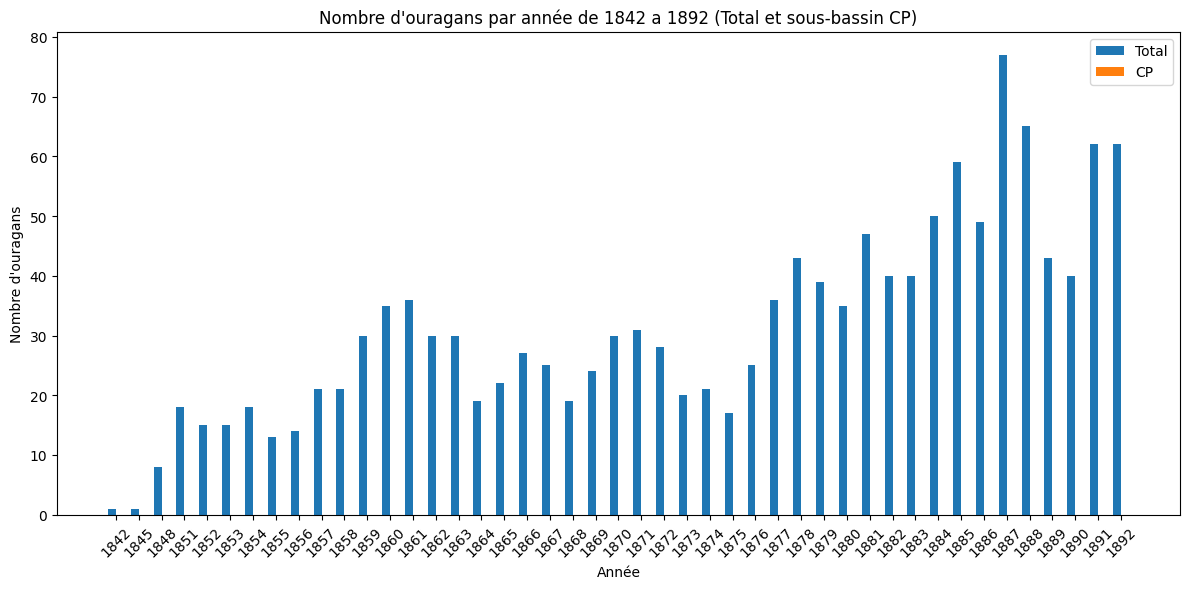

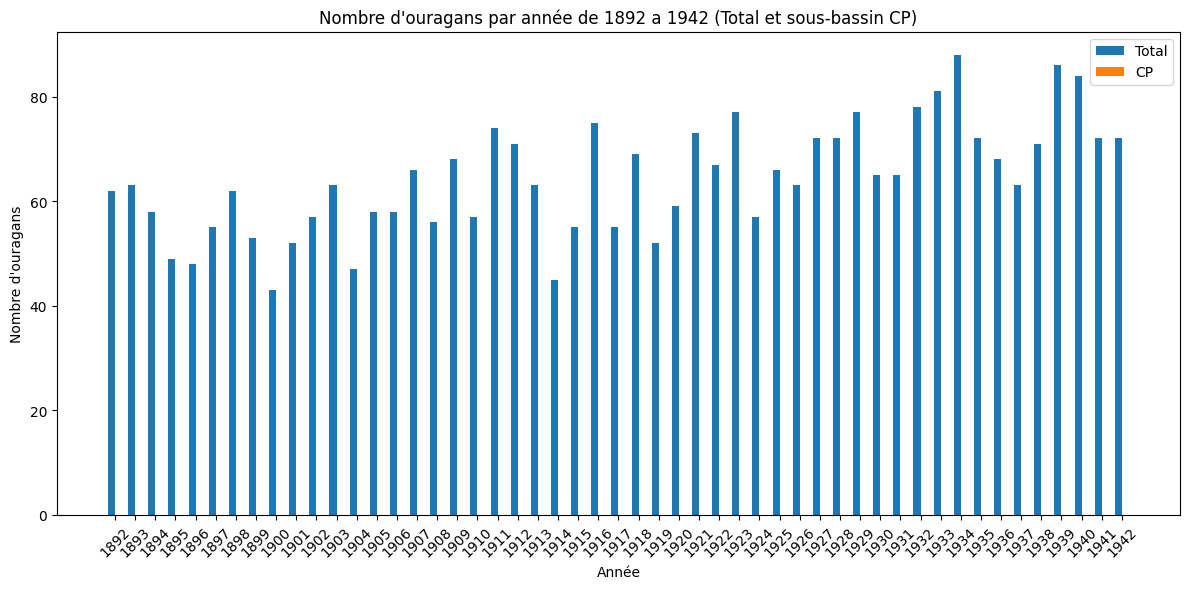

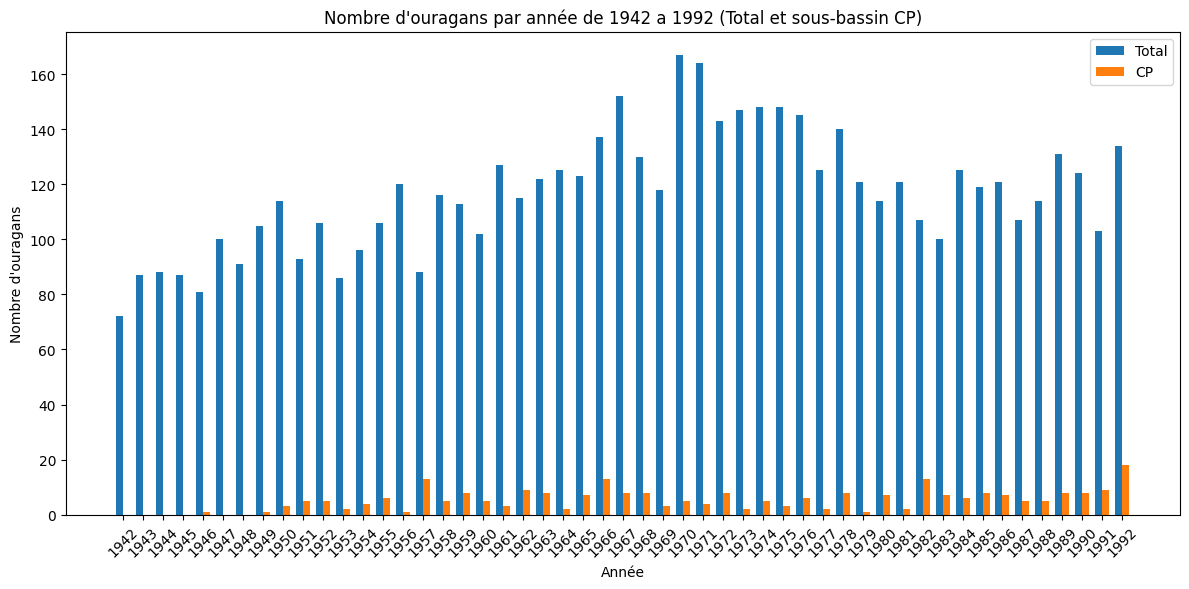

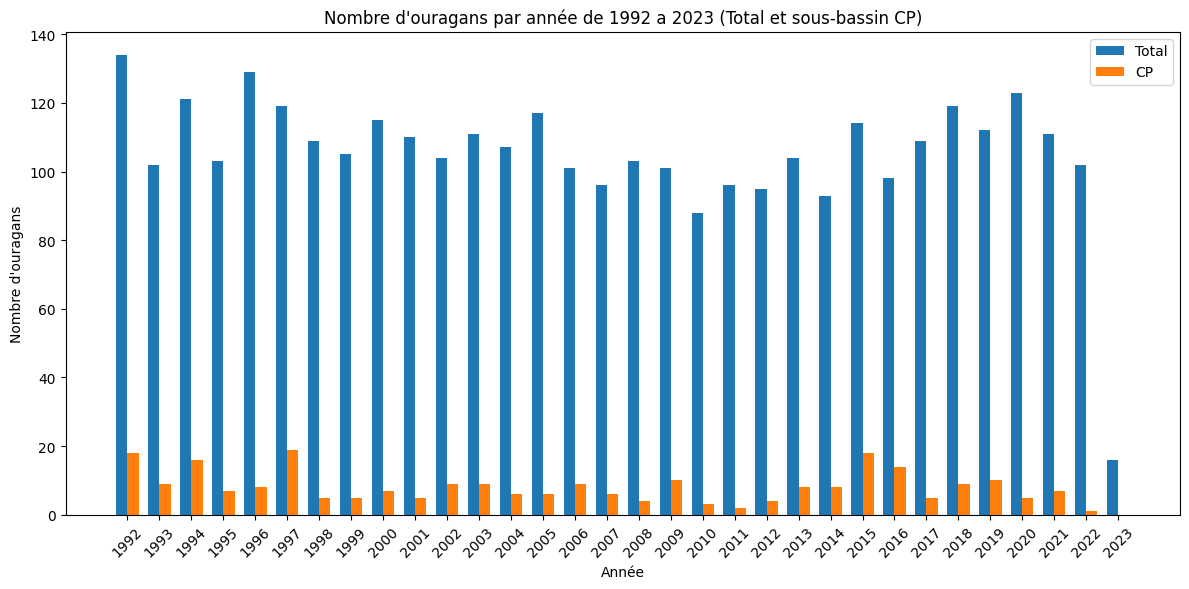

In [11]:
getNumberHurricaneByYear(all_data)

In [12]:
getStatsHurricaneByYear(all_data)


                Ouragans dans le monde entre 1842 et 2023 :
                pour un total de 13750 ouragans.

                -Année avec le plus d'ouragans : 1970
                 Nombre d'ouragans : 167

                -Année avec le moins d'ouragans : 1845
                 Nombre d'ouragans : 1

                -Avec en moyenne 78.12 ouragans par année.

                Ouragans dans le sous-bassin "CP" entre 1842 et 2023 :
                pour un total de 501 ouragans.

                -Année avec le plus d'ouragans : 1997
                 Nombre d'ouragans : 19

                -Année avec le moins d'ouragans : 2022
                 Nombre d'ouragans : 1

                -Avec en moyenne 6.68 ouragans par année.


                


## Nous allons maintenant regarder uniquement les données des évènements nommés sur l'arc antillais

In [13]:
data_caribeen = pd.read_csv("data/hurricanes_Past_In_Caribbean.csv")
data_caribeen.shape[0]

713230

In [14]:
nb_hurricane_caribeen = getNumberOfHurricane(data_caribeen)

In [15]:
print(f"""
Il y a {nb_hurricane_caribeen} ouragans nommés sur l'arc antillais entre {data_caribeen['year'].min()} et {data_caribeen['year'].max()}
""")


Il y a 738 ouragans nommés sur l'arc antillais entre 1950 et 2022



In [16]:
print("vitesse minimum sur l'arc antillais",data_caribeen['USA_WIND'].min())
print("vitesse maximum sur l'arc antillais",data_caribeen['USA_WIND'].max())
print("pression minimum sur l'arc antillais",data_caribeen['USA_PRES'].min())
print("pression maximum sur l'arc antillais",data_caribeen['USA_PRES'].max())

vitesse minimum sur l'arc antillais 0
vitesse maximum sur l'arc antillais 165
pression minimum sur l'arc antillais 0
pression maximum sur l'arc antillais 1020


In [17]:
fast_hurricanes = data_caribeen[data_caribeen['USA_WIND'] == data_caribeen['USA_WIND'].max()]
year_fast_hurricane = fast_hurricanes['year'].unique()
name_fast_hurricane = fast_hurricanes['NAME'].unique()

In [18]:
data_fast_hurricanes = data_caribeen[(data_caribeen['year'] == year_fast_hurricane[0]) & (data_caribeen['NAME'] == name_fast_hurricane[0])]
data_fast_hurricanes.describe()

,Unnamed: 0,OBJECTID,LAT,LON,USA_WIND,USA_PRES,year,month,day
count,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.0,2209.0,2209.000000
mean,418557.000000,418558.000000,18.490426,-76.294468,132.276596,937.148936,1980.0,8.0,5.936170
std,13.567731,13.567731,3.899771,11.762408,19.331022,18.737508,0.0,0.0,1.743518
min,418534.000000,418535.000000,12.800000,-94.200000,80.000000,899.000000,1980.0,8.0,3.000000
25%,418545.000000,418546.000000,14.580000,-87.170000,120.000000,920.000000,1980.0,8.0,4.000000
50%,418557.000000,418558.000000,18.730000,-76.950000,135.000000,940.000000,1980.0,8.0,6.000000
75%,418569.000000,418570.000000,22.010000,-65.800000,150.000000,950.000000,1980.0,8.0,7.000000
max,418580.000000,418581.000000,25.000000,-55.600000,165.000000,975.000000,1980.0,8.0,9.000000


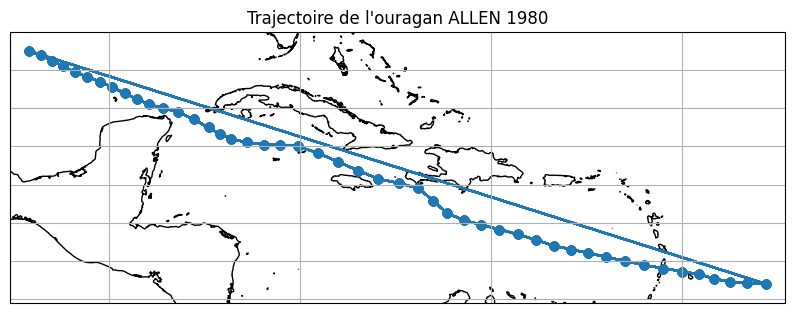

In [19]:
getGraphicsHurricane(data_fast_hurricanes)

In [20]:
most_press_hurricanes = data_caribeen[data_caribeen['USA_PRES'] == data_caribeen['USA_PRES'].max()]
year_most_press_hurricane = most_press_hurricanes['year'].unique()
name_most_press_hurricane = fast_hurricanes['NAME'].unique()

data_most_press_hurricane = data_caribeen[(data_caribeen['year'] == year_most_press_hurricane[0]) & (data_caribeen['NAME'] == name_most_press_hurricane[0])]
data_fast_hurricanes.describe()

print(year_most_press_hurricane)
print(name_most_press_hurricane)

[1993]
['ALLEN']


In [21]:
getGraphicsHurricane(data_most_press_hurricane)


        Le nombre d'occurrence maximum étant : 33 avec 1 ligne par dataframe 
        nous récupèrerons la seconde valeur la plus haute
        
Le nombre d'occurrence max est maintenant : 
        30 avec 169 ligne par dataframe
Maximum d'occurrences de lignes : 30
Clés correspondant à la valeur maximale : 169
30
DataFrames ayant le maximum d'occurrences de lignes :

    La latitude moyenne est de 17.065923076923077
    La latitude min est de 10.127692307692309
    La latitude max est de 24.52538461538462
    
    La longitude moyenne est de -81.83353846153847
    La longitude min est de -98.15153846153846
    La longitude max est de -56.51769230769229
    


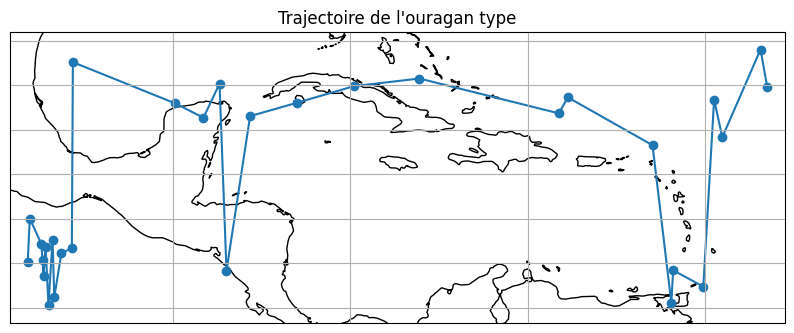

In [22]:
data_caribean = getSeparedHurricaneByName(data_caribeen)
liste = getOcurrenceDataframe(data_caribean)
getMeanHurricane(liste)

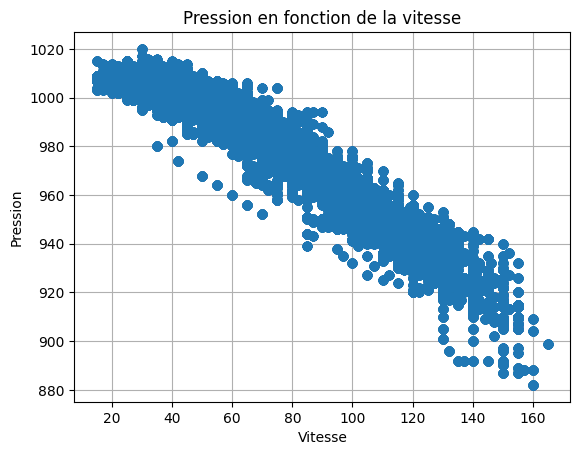

In [23]:
data_caribeen_prepared = data_caribeen.copy()
data_caribeen_prepared = data_caribeen_prepared[(data_caribeen_prepared['USA_WIND'] != 0) & (data_caribeen_prepared['USA_PRES'] != 0)]
getGraphPressionVersusSpeed(data_caribeen_prepared)

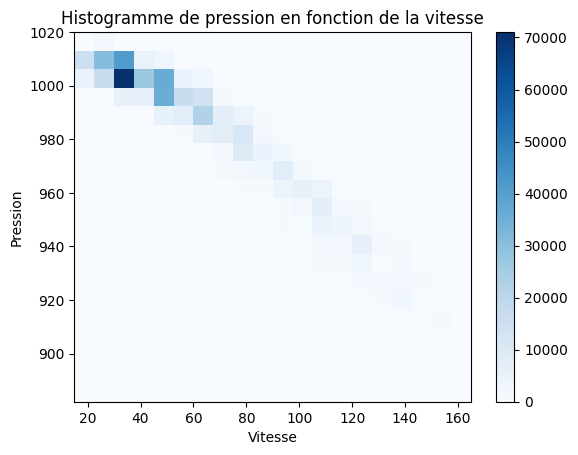

In [24]:
getHistPressionVersusSpeed(data_caribeen_prepared)